In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



In [2]:
data=pd.read_csv("Country-data.csv")

In [3]:
data.head(17)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.shape

(167, 10)

In [6]:
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [7]:
data.duplicated().sum()


0

In [8]:
 #Converting imports, exports and health spending percentages to absolute values.
data['exports'] = data['exports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [21]:
data.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,-0.103847,0.111523,48.410000
std,0.908168,4.768345,29.341629
min,-2.619745,-9.593856,1.000000
25%,-0.600906,-4.028303,21.500000
50%,-0.126956,0.420536,51.500000
75%,0.405952,2.690852,66.250000
max,1.852278,13.600846,99.000000


In [9]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [11]:
import math
row = math.ceil(len(data.columns) / 2)
col = 2

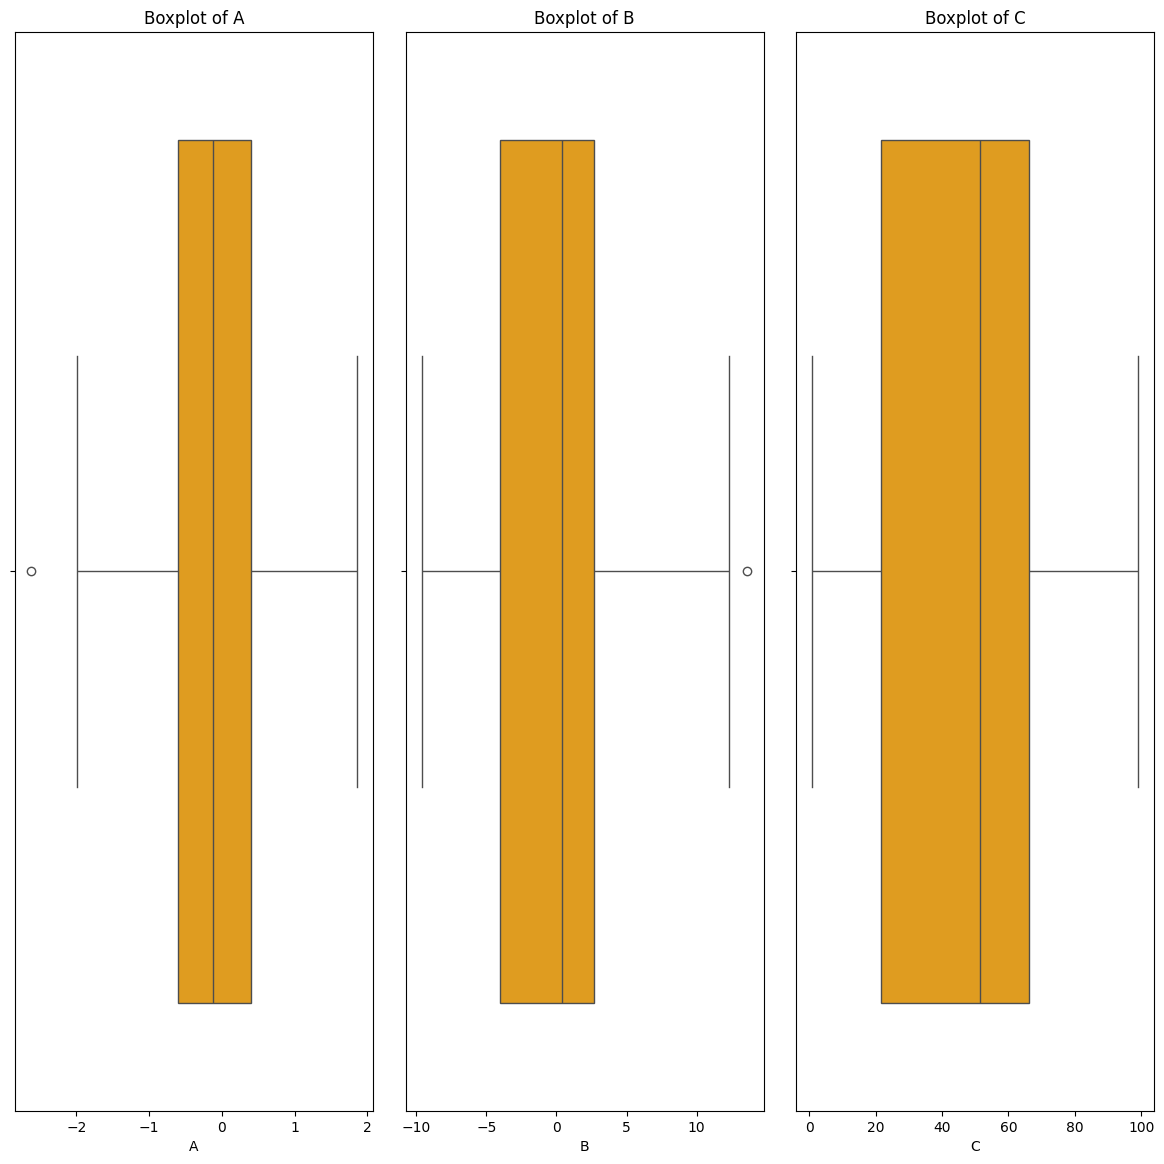

In [13]:
np.random.seed(42)
data = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.randn(100) * 5,
    'C': np.random.randint(1, 100, 100)
})

# Selecting numeric columns
var = data.select_dtypes(exclude='object').columns

col = 3
row = math.ceil(len(data.columns) / col)

plt.figure(figsize=(12, 12))

for i, col_name in enumerate(var):
    plt.subplot(row, col, i + 1)
    sns.boxplot(x=data[col_name], color="orange")
    plt.title(f"Boxplot of {col_name}")
    plt.tight_layout(pad=2)

plt.show()

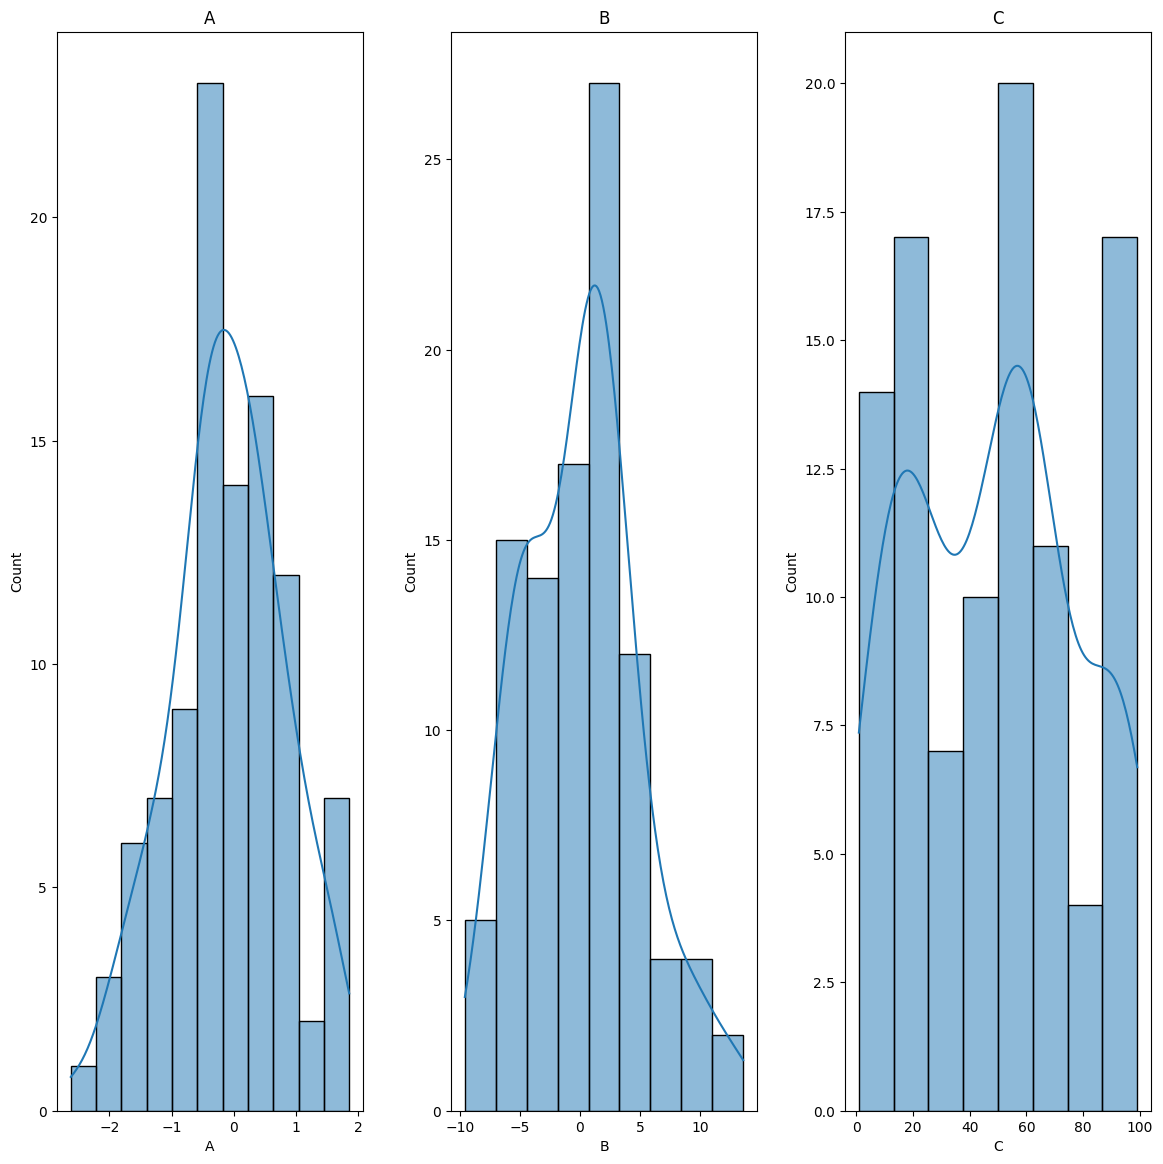

In [16]:
# distrbution plot
var = data.select_dtypes(exclude='object').columns


col = 3
row = math.ceil(len(var) / col)


plt.figure(figsize=(12, 12))

for idx, col_name in enumerate(var):
    plt.subplot(row, col, idx + 1)
    sns.histplot(data[col_name], kde=True)
    plt.title(col_name)

plt.tight_layout(pad=2)
plt.show()

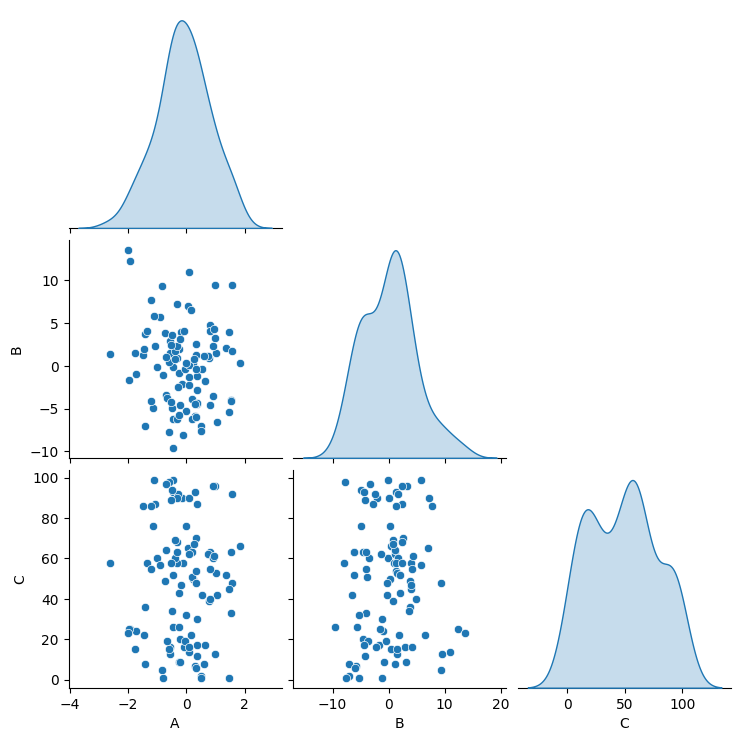

In [18]:
# pairplot for continuous data type
sns.pairplot(data.select_dtypes(['int64','float64']), diag_kind='kde', corner=True)
plt.show()

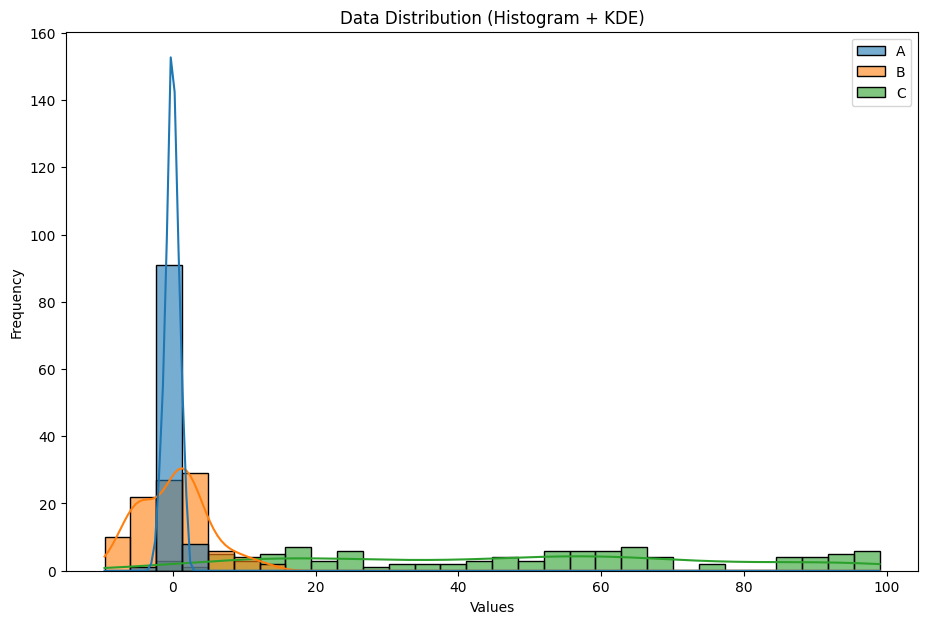

In [17]:

# Histogram
plt.figure(figsize=(11,7))
sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.6)
plt.title("Data Distribution (Histogram + KDE)")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()


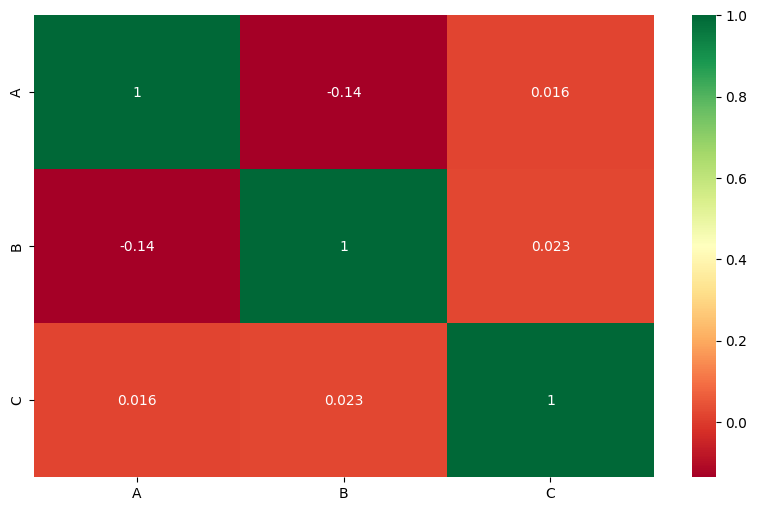

In [20]:
# look at the correlation between continous varibales using heat map
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()